# 2DG Perturbation Rep 1 - Analysing Skeletons
In this notebook we will use code shared by Allyson Quinn Ryan (Details Publication) to find the longest distance in the skeleton images:

C:\Users\savill\mambaforge-pypy3\envs\jesse_env\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


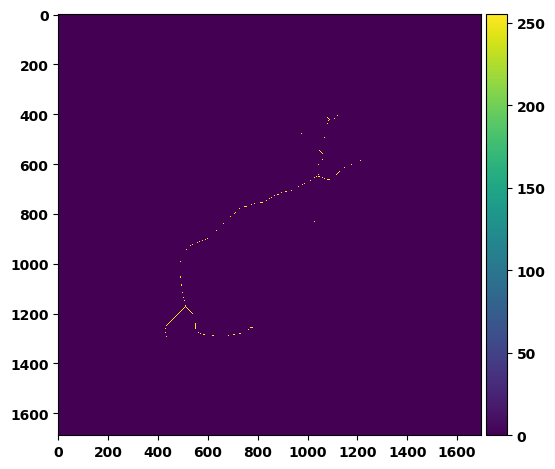

In [1]:
import os
import skimage.io as io
from __future__ import division, print_function

import os
import matplotlib.pyplot as plt
from skimage.io import imread, imsave

%matplotlib inline

from toska_functions import *

home_directory = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation/"
path = home_directory + "image_data/Processed Data/Perturbation Analysis/Skeletons/"

collection = io.imread_collection(path+"/*skeleton.tif")

io.imshow(collection[0])

Testing the workflow and making a function to measure the longest distance:

In [2]:
%%time
skel = collection[0]
coords, e_pts, b_pts, brnch, brnch_ids, brnch_lengths = n8_parse_skel_2d(skel.astype(bool), 0, 1)

CPU times: total: 15.6 ms
Wall time: 104 ms


In [4]:
bp_img, n_bp = n8_relabel_brnch_pts(b_pts, brnch.shape, brnch.dtype)
adj_mat = n8_adjacency_matrix(e_pts, bp_img, n_bp, brnch, len(brnch_ids))

In [6]:
nodes, weighted_edges, G = skeleton_network(adj_mat, brnch_lengths)
spine_path, spine_length = skeleton_spine_search(nodes, G)

In [7]:
spine_length

[1381]

C:\Users\savill\mambaforge-pypy3\envs\jesse_env\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


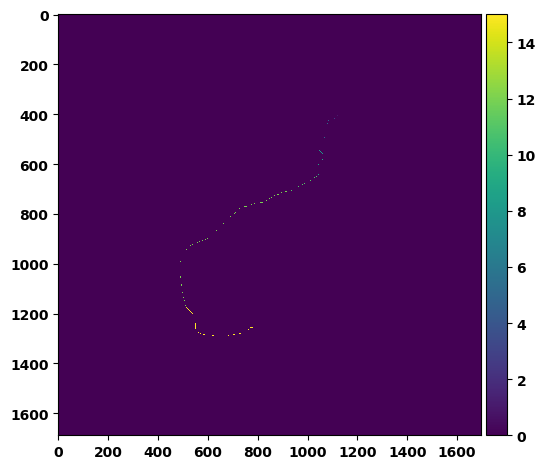

In [8]:
spine_edges = spine_edges(spine_path)
map_spine_edges = map_spine_edges(spine_edges, adj_mat, brnch_lengths, brnch_ids)
img_spine = create_spine_img(brnch, map_spine_edges)

io.imshow(img_spine)

In [10]:
def find_spine_length(skeleton):
    coords, e_pts, b_pts, brnch, brnch_ids, brnch_lengths = n8_parse_skel_2d(skeleton.astype(bool), 0, 1)
    bp_img, n_bp = n8_relabel_brnch_pts(b_pts, brnch.shape, brnch.dtype)
    adj_mat = n8_adjacency_matrix(e_pts, bp_img, n_bp, brnch, len(brnch_ids))
    nodes, weighted_edges, G = skeleton_network(adj_mat, brnch_lengths)
    spine_path, spine_length = skeleton_spine_search(nodes, G)

    return spine_length[0]

find_spine_length(collection[1])

1142

Processing all skeletons:

In [17]:
names = []
lengths = []
for skeleton, name in zip(collection,collection.files):
    name_short = os.path.split(name)[1][:-18]
    names.append(name_short)
    lengths.append(find_spine_length(skeleton))
    
lengths

[1381,
 1142,
 1401,
 775,
 1683,
 1669,
 1288,
 1341,
 1537,
 1015,
 982,
 800,
 1255,
 1106,
 672,
 692,
 827,
 1324,
 751,
 1204,
 772,
 882,
 1340,
 1627,
 1467,
 913,
 980,
 929,
 802,
 1346,
 1054,
 918,
 1163,
 937,
 1666,
 1419,
 1260,
 885,
 865,
 960,
 844,
 1079,
 1986,
 1289,
 980,
 880,
 1007,
 1001,
 1035,
 1587,
 1558,
 1431,
 1435,
 815,
 928,
 992,
 1725,
 1046,
 1202,
 1133,
 651,
 860,
 487,
 1164,
 592,
 537,
 1093,
 804,
 610,
 863,
 766,
 755,
 643,
 935,
 888,
 586,
 1288,
 912,
 1129,
 769,
 769,
 509,
 911,
 841,
 1307,
 951,
 1139,
 699,
 1223,
 600,
 631,
 1007,
 1034,
 574,
 1238,
 1231,
 726,
 1239,
 826,
 1017,
 793,
 992,
 642,
 1564,
 891,
 954,
 947,
 1113,
 841,
 1118,
 1126,
 2043,
 1753,
 1313,
 1702,
 1769,
 882,
 1204,
 1688,
 782,
 1606,
 1468,
 1404,
 897,
 1724,
 1412,
 1596,
 1553,
 1421,
 1802,
 1596,
 1937,
 1558,
 1054,
 1113,
 1483,
 864,
 1604,
 2150,
 1631,
 1799,
 845,
 2069,
 1506,
 1529,
 2033,
 887,
 1779,
 1364,
 1710,
 959,
 1959,
 

In [18]:
import pandas as pd
output_dataframe = pd.DataFrame({
    "File Name":names,
    "Skeleton Spine Length [pixels]":lengths
})

output_dataframe

,File Name,Skeleton Spine Length [pixels]
0,2DG_2mM_72h_P1_17_001,1381
1,2DG_2mM_72h_P1_18_001,1142
2,2DG_2mM_72h_P1_19_001,1401
3,2DG_2mM_72h_P1_20_001,775
4,2DG_2mM_72h_P1_21_001,1683
...,...,...
315,2DG_5mM_Control_P2_126_001,1373
316,2DG_5mM_Control_P2_127_001,971
317,2DG_5mM_Control_P2_128_001,2199
318,2DG_5mM_Control_P2_129_001,1599


In [20]:
output_dataframe["Treatment"] = [name[:7] for name in output_dataframe["File Name"]]
output_dataframe["Time"] = [name[8:11] for name in output_dataframe["File Name"]]
output_dataframe

,File Name,Skeleton Spine Length [pixels],Treatment,Time
0,2DG_2mM_72h_P1_17_001,1381,2DG_2mM,72h
1,2DG_2mM_72h_P1_18_001,1142,2DG_2mM,72h
2,2DG_2mM_72h_P1_19_001,1401,2DG_2mM,72h
3,2DG_2mM_72h_P1_20_001,775,2DG_2mM,72h
4,2DG_2mM_72h_P1_21_001,1683,2DG_2mM,72h
...,...,...,...,...
315,2DG_5mM_Control_P2_126_001,1373,2DG_5mM,Con
316,2DG_5mM_Control_P2_127_001,971,2DG_5mM,Con
317,2DG_5mM_Control_P2_128_001,2199,2DG_5mM,Con
318,2DG_5mM_Control_P2_129_001,1599,2DG_5mM,Con


Checking the Results and Saving

<Axes: xlabel='Treatment', ylabel='Skeleton Spine Length [pixels]'>

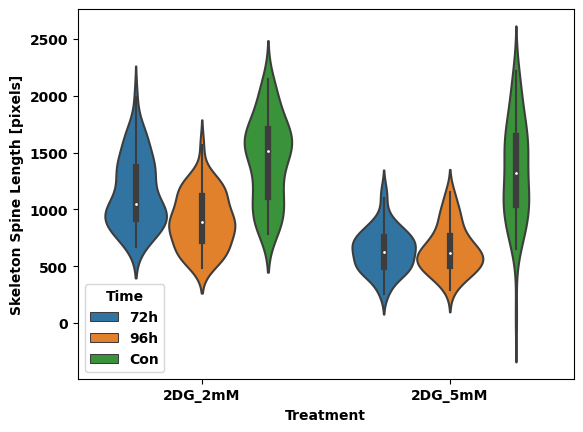

In [21]:
import seaborn as sns
sns.violinplot(output_dataframe,x="Treatment",y="Skeleton Spine Length [pixels]",hue="Time")

In [22]:
output_dataframe.to_csv(home_directory+"/tabular_data/2DG Rep 1 Spine Lengths.csv")